Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


 Step 2: Load Data

In [5]:
df = pd.read_csv('/kaggle/input/house-prices-dataset/train.csv')  # Adjust path if needed
df.shape  # See number of rows & columns
df.head()  # Preview


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Step 3: Visualize Relationships

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


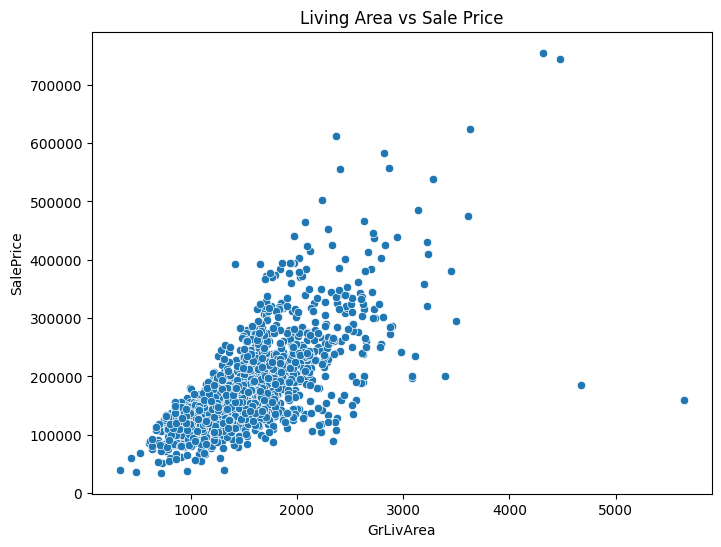

In [7]:
# Check correlation with target
correlation = df.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False)
print(correlation.head(10))



# Example plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title('Living Area vs Sale Price')
plt.show()


Step 4: Select Features

In [9]:
X = df[['GrLivArea']]  # Feature: Ground Living Area
y = df['SalePrice']    # Target: House Price


Step 5: Train/Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 6: Build & Train Model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficient & intercept
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Slope: 102.48895891672333
Intercept: 24899.74815733818


Step 7: Predictions & Evaluation

In [12]:
y_pred = model.predict(X_test)

# Metrics
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):,.2f}")



R² Score: 0.55
RMSE: 58,471.76


Step 8: Visualize the Regression Line

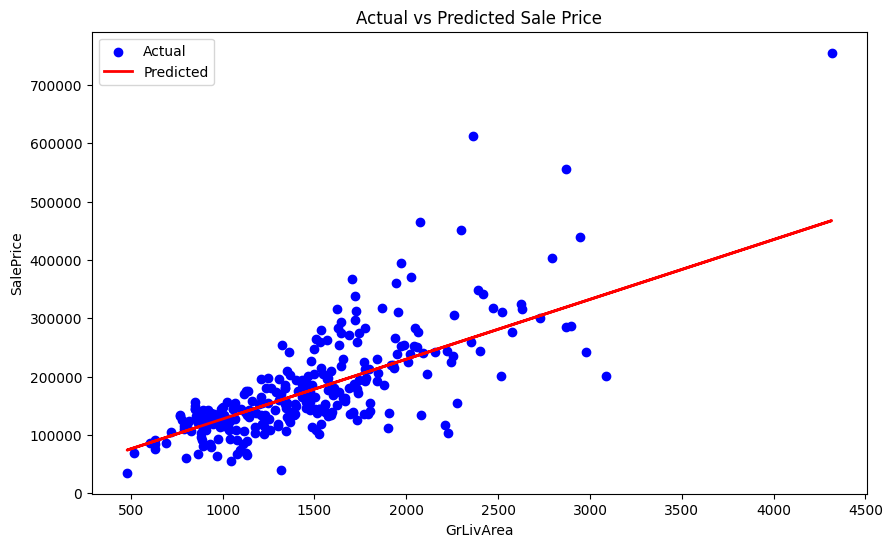

In [15]:
import os

# Create the folder if it doesn't exist
os.makedirs("../outputs", exist_ok=True)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Actual vs Predicted Sale Price")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.savefig("../outputs/regression_plot.png")
plt.show()


In [16]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ensure the output folder exists
import os
os.makedirs("../outputs", exist_ok=True)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
x_vals = X_test.sort_values(by='GrLivArea').values.flatten()
y_vals = y_test[X_test.sort_values(by='GrLivArea').index].values.flatten()

line, = ax.plot([], [], 'r-', linewidth=2, label="Regression Line")
scatter = ax.scatter(x_vals, y_vals, color='blue', label='Actual Data')

ax.set_xlim(min(x_vals) - 100, max(x_vals) + 100)
ax.set_ylim(min(y_vals) - 10000, max(y_vals) + 10000)
ax.set_title("Animated Regression Line")
ax.set_xlabel("GrLivArea")
ax.set_ylabel("SalePrice")
ax.legend()

# Animation update function
def update(frame):
    # Frame ranges from 0 to 1
    slope = model.coef_[0] * frame
    intercept = model.intercept_ * frame
    x = np.linspace(min(x_vals), max(x_vals), 100)
    y = slope * x + intercept
    line.set_data(x, y)
    return line,

# Create animation
anim = FuncAnimation(fig, update, frames=np.linspace(0, 1, 30), interval=100)

# Save as GIF
anim.save("../outputs/regression_animation.gif", writer='pillow')

plt.close(fig)  # Avoid showing static image after animation
print("✅ GIF saved to: outputs/regression_animation.gif")


✅ GIF saved to: outputs/regression_animation.gif


In [ ]:
### 🎞️ Animated Regression Line
![Regression Animation](outputs/regression_animation.gif)
